In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from datetime import datetime
import pytz

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 32335.6738 - val_loss: 31561.9473
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30854.7285 - val_loss: 28714.1016
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27345.6328 - val_loss: 21650.6328
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19007.2637 - val_loss: 9717.0791
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7147.1143 - val_loss: 1221.7692
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 788.0671 - val_loss: 632.1713
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 489.1224 - val_loss: 519.3456
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 397.7975 - val_loss: 528.8787
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 402.4966 - val_loss: 448.1482
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 394.7225 - val_loss: 579.4176
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 387.9393 - val_loss: 482.2323
Epoch 12/50
7

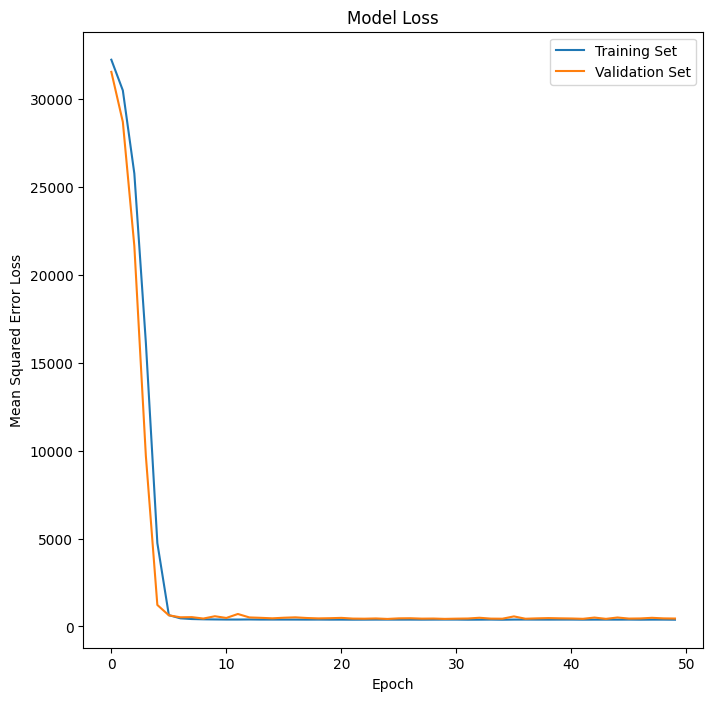

In [2]:
# DNN-30-16-8 Model without optimizer
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(16))  # Second hidden layer with 16 units
    model.add(Dense(8))  # Third hidden layer with 8 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 21673.0820 - val_loss: 18321.2109
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15377.1191 - val_loss: 7625.4370
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12854.4854 - val_loss: 9957.5205
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13970.9648 - val_loss: 20960.2402
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16947.3359 - val_loss: 17996.9238
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15460.1738 - val_loss: 31194.1934
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15555.2969 - val_loss: 9776.7422
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14493.3926 - val_loss: 8321.7900
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17918.3730 - val_loss: 2629.0669
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11648.6270 - val_loss: 8630.7100
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11892.5449 - val_loss: 6341.6250
Epoc

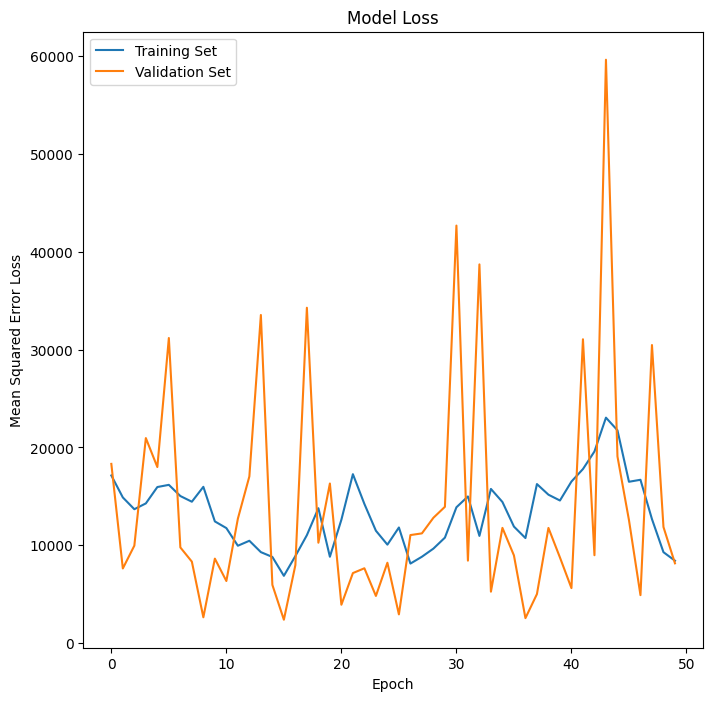

In [3]:
# DNN-30-16-8 Model with SGD optimizer and LR of 0.1
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(16))  # Second hidden layer with 16 units
    model.add(Dense(8))  # Third hidden layer with 8 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.1, clipvalue=1.0))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16017.4219 - val_loss: 523.5996
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 540.6177 - val_loss: 615.7040
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 627.8860 - val_loss: 649.4796
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 542.7224 - val_loss: 1549.6387
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 675.5340 - val_loss: 545.2870
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 624.8417 - val_loss: 524.7208
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 481.1267 - val_loss: 687.8146
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 500.2182 - val_loss: 566.1330
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 672.1562 - val_loss: 579.1304
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 493.7262 - val_loss: 1077.6541
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 702.0040 - val_loss: 1172.1628
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━

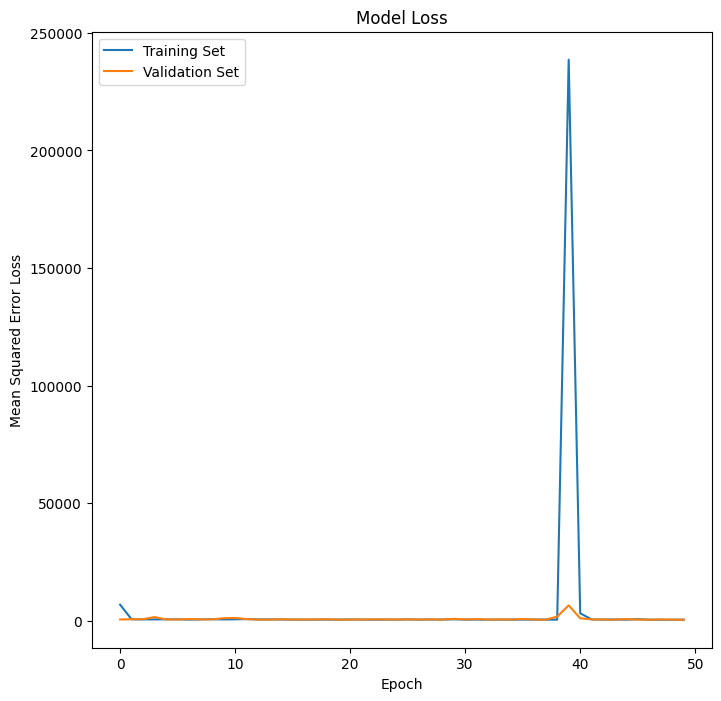

In [3]:
# DNN-30-16-8 Model with Adam optimizer and LR of 0.1
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(16))  # Second hidden layer with 16 units
    model.add(Dense(8))  # Third hidden layer with 8 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.1))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 24483.8457 - val_loss: 648.1569
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 872.2805 - val_loss: 1200.8081
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 796.4365 - val_loss: 877.2783
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 679.9239 - val_loss: 864.6937
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 693.2615 - val_loss: 682.0641
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 776.3417 - val_loss: 622.6423
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 685.9547 - val_loss: 1036.1798
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 641.9724 - val_loss: 1060.1371
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 661.3726 - val_loss: 1474.1483
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 601.5840 - val_loss: 536.0092
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 621.7057 - val_loss: 594.5553
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━

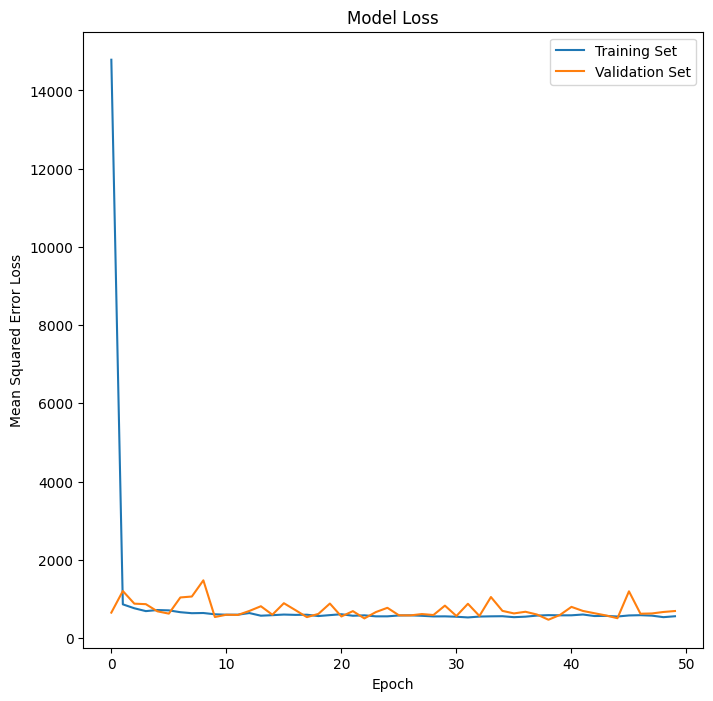

In [4]:
# DNN-30-16-8 Model with SGD optimizer and LR of 0.01
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(16))  # Second hidden layer with 16 units
    model.add(Dense(8))  # Third hidden layer with 8 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, clipvalue=1.0))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 25299.2520 - val_loss: 647.1299
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 599.6693 - val_loss: 630.5530
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 479.1890 - val_loss: 580.5731
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 581.6862 - val_loss: 665.1872
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 502.0737 - val_loss: 548.2452
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 568.0925 - val_loss: 582.3790
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 551.8180 - val_loss: 455.0999
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 479.6994 - val_loss: 483.7524
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 428.0866 - val_loss: 476.0017
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 404.4163 - val_loss: 513.7007
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 433.2140 - val_loss: 473.6181
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 

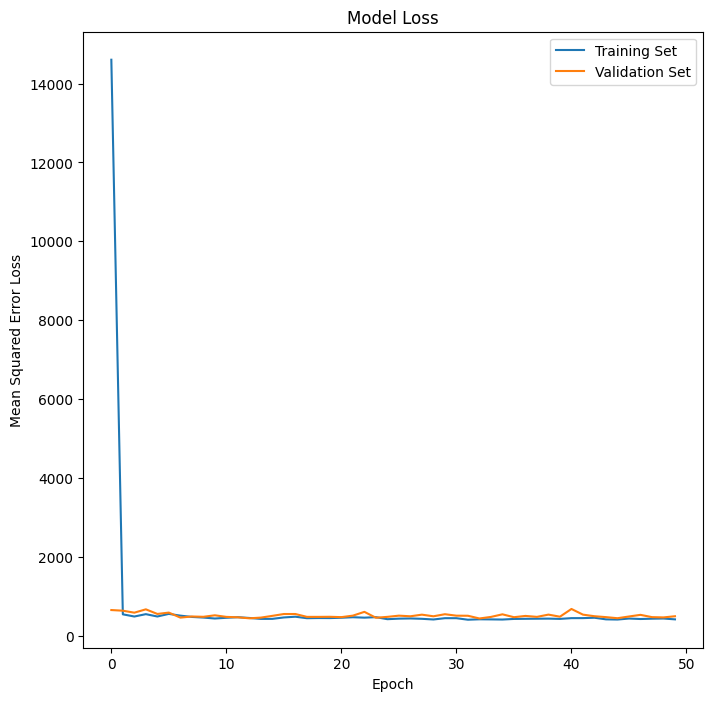

In [4]:
# DNN-30-16-8 Model with Adam optimizer and LR of 0.01
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(16))  # Second hidden layer with 16 units
    model.add(Dense(8))  # Third hidden layer with 8 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32828.8203 - val_loss: 31692.7051
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31501.1055 - val_loss: 29371.4199
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28704.9453 - val_loss: 23718.0059
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22216.0840 - val_loss: 13713.9502
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12820.2227 - val_loss: 3509.2856
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5975.6934 - val_loss: 707.7576
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3714.8118 - val_loss: 582.1390
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3400.0063 - val_loss: 501.9900
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2323.3867 - val_loss: 484.3910
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2108.6880 - val_loss: 556.9233
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1539.3254 - val_loss: 484.3414
Epoch 12/50
77/7

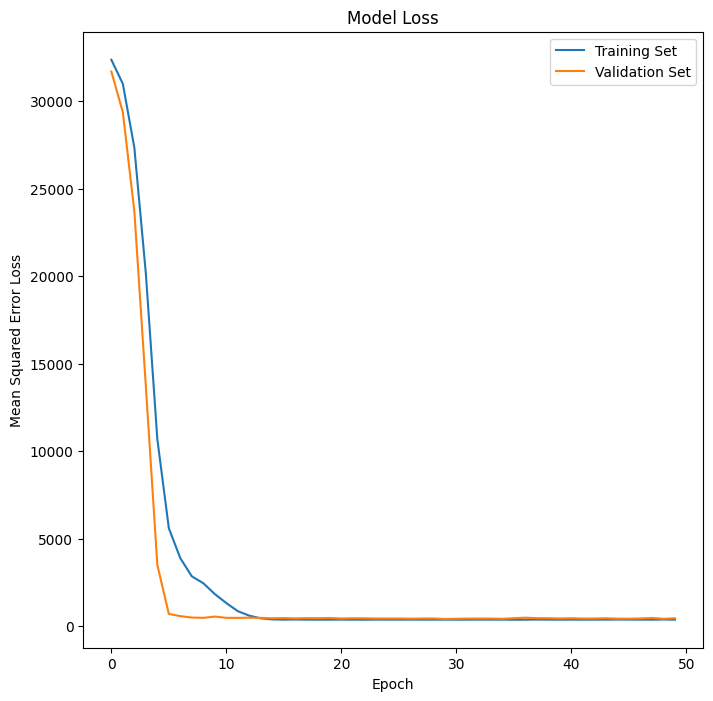

In [5]:
# DNN-30-16-8 Model with SGD optimizer and LR of 0.001
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(16))  # Second hidden layer with 16 units
    model.add(Dense(8))  # Third hidden layer with 8 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.001, clipvalue=1.0))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 32539.6855 - val_loss: 31808.0488
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31198.8320 - val_loss: 27746.0430
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24257.8281 - val_loss: 9906.5127
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5605.0952 - val_loss: 540.1717
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 487.1935 - val_loss: 465.6289
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 425.0749 - val_loss: 431.5107
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 386.8621 - val_loss: 465.3169
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 401.9268 - val_loss: 442.1353
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 364.6000 - val_loss: 452.3735
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 372.4798 - val_loss: 422.9583
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 377.4095 - val_loss: 446.7005
Epoch 12/50
77/77 ━━━━━━━━━━━

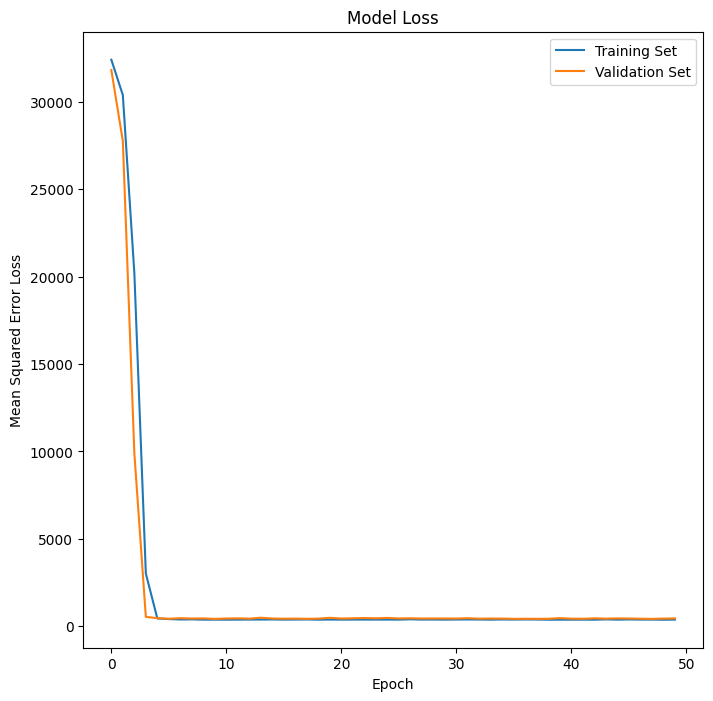

In [5]:
# DNN-30-16-8 Model with Adam optimizer and LR of 0.001
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(16))  # Second hidden layer with 16 units
    model.add(Dense(8))  # Third hidden layer with 8 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32900.5430 - val_loss: 32396.3105
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32608.3203 - val_loss: 32337.3086
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32501.5625 - val_loss: 32274.5762
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32215.1191 - val_loss: 32205.3633
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32405.5059 - val_loss: 32129.2520
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32058.7617 - val_loss: 32047.9512
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32307.1465 - val_loss: 31955.3281
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32126.7988 - val_loss: 31851.5508
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31984.6250 - val_loss: 31739.6914
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32094.8379 - val_loss: 31616.5312
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31689.5020 - val_loss: 31477.89

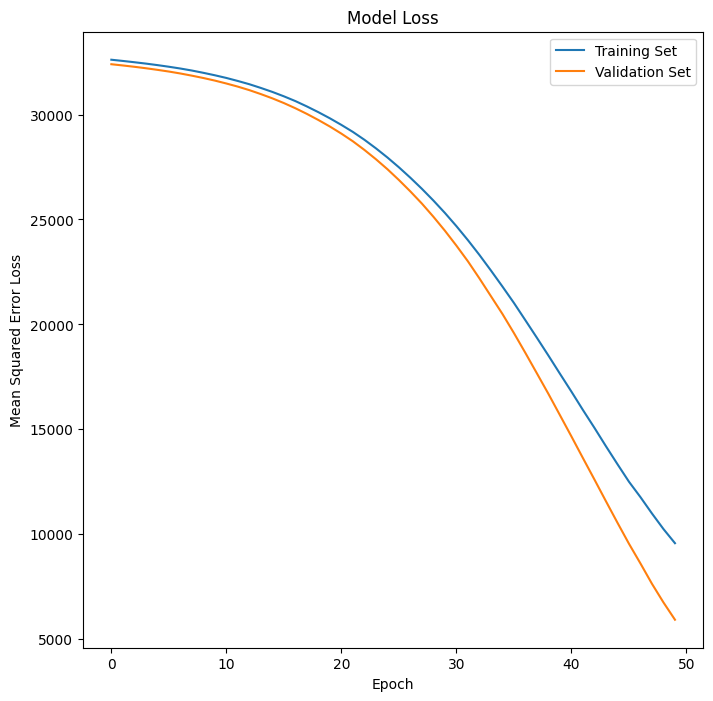

In [6]:
# DNN-30-16-8 Model with SGD optimizer and LR of 0.0001
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(16))  # Second hidden layer with 16 units
    model.add(Dense(8))  # Third hidden layer with 8 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.0001, clipvalue=1.0))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32777.0391 - val_loss: 32458.6855
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32664.8633 - val_loss: 32407.8008
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32256.9004 - val_loss: 32354.0332
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32939.5352 - val_loss: 32292.8125
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32740.4180 - val_loss: 32220.3281
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32382.9688 - val_loss: 32135.2617
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32114.0469 - val_loss: 32029.4062
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31907.1465 - val_loss: 31903.3086
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31856.7363 - val_loss: 31744.8828
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32253.1680 - val_loss: 31547.4531
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31609.3672 - val_loss: 31311.81

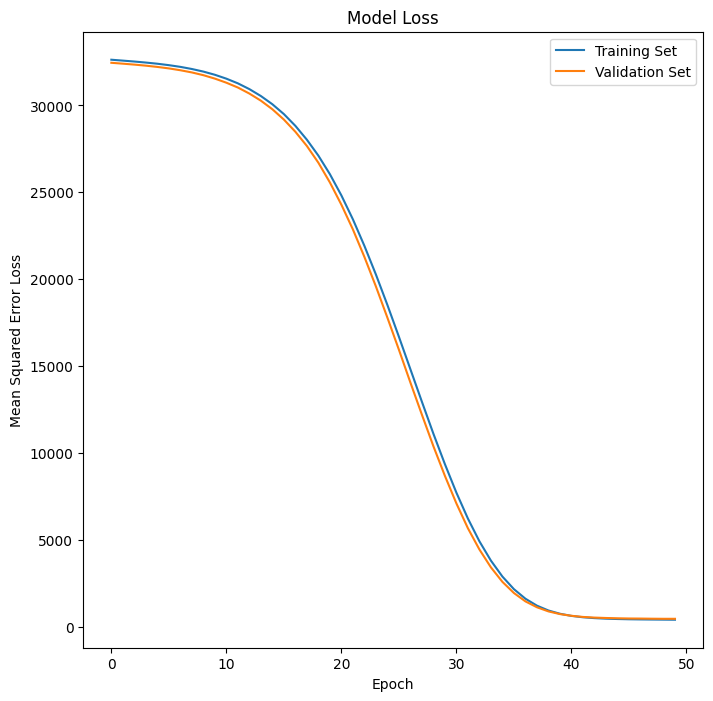

In [6]:
# DNN-30-16-8 Model with Adam optimizer and LR of 0.0001
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(16))  # Second hidden layer with 16 units
    model.add(Dense(8))  # Third hidden layer with 8 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()